In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn import cross_validation, metrics
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import cross_val_score
%matplotlib inline

In [35]:
data_train = pd.read_csv("../input/train_u6lujuX_CVtuZ9i.csv") 

data_test = pd.read_csv("../input/test_Y3wMUE5_7gLdaTN.csv") 

In [36]:
data_train.shape

(614, 13)

In [37]:
data_test.shape

(367, 12)

In [38]:
data_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [40]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [41]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [42]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
#test.isnull().sum()

In [44]:
train = pd.read_csv("../input/train_u6lujuX_CVtuZ9i.csv") 
test = pd.read_csv("../input/test_Y3wMUE5_7gLdaTN.csv") 
targets = train.Loan_Status

train.drop('Loan_Status', 1, inplace=True)
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)

In [45]:
combined.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [46]:
combined.shape

(981, 11)

In [47]:
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [48]:
# To check how many columns have missing values - this can be repeated to see the progress made
def show_missing():
    missing = combined.columns[combined.isnull().any()].tolist()
    return missing


In [49]:
#from this we can find the total missing data in each columns

combined[show_missing()].isnull().sum()

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [50]:
print (combined['Property_Area'].value_counts())
print (combined['Education'].value_counts())
print (combined['Gender'].value_counts())
print (combined['Dependents'].value_counts())
print (combined['Married'].value_counts())
print (combined['Self_Employed'].value_counts())
print (combined['Credit_History'].value_counts())

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
Male      775
Female    182
Name: Gender, dtype: int64
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64
Yes    631
No     347
Name: Married, dtype: int64
No     807
Yes    119
Name: Self_Employed, dtype: int64
1.0    754
0.0    148
Name: Credit_History, dtype: int64


In [51]:
#filling data with approperiate measure of central tendency
combined['Gender'].fillna('Male', inplace=True)
combined['Married'].fillna('Yes', inplace=True)

combined['Self_Employed'].fillna('Yes', inplace=True)

combined['Credit_History'].fillna(1, inplace=True)

combined['LoanAmount'].fillna(combined['LoanAmount'].median(), inplace=True)
#combined['Loan_Amount_Term'].fillna(combined['Loan_Amount_Term'].mean(), inplace=True)


In [52]:
combined.isnull().sum()

Gender                0
Married               0
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

## Visualization

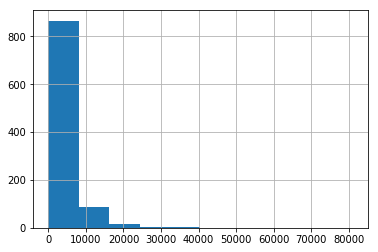

In [53]:
combined['ApplicantIncome'].hist()

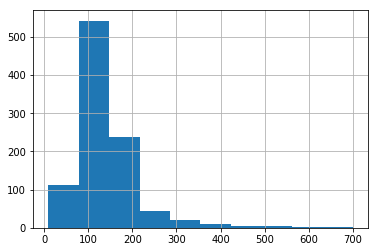

In [54]:
combined['LoanAmount'].hist()

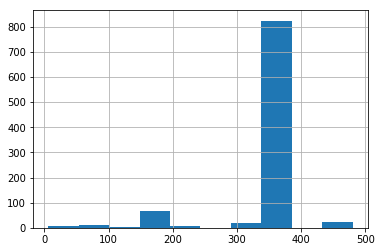

In [55]:
combined['Loan_Amount_Term'].hist()

Text(0,0.5,'mean ApplicantIncom')

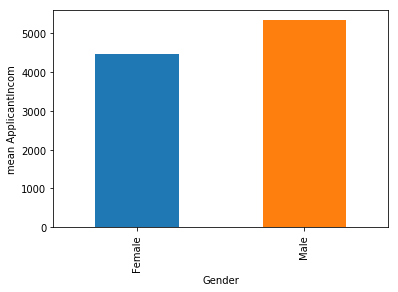

In [56]:
ax = combined.groupby('Gender').ApplicantIncome.mean().plot(kind='bar')
ax.set_xlabel("Gender")
ax.set_ylabel("mean ApplicantIncom")

Text(0,0.5,'mean ApplicantIncom')

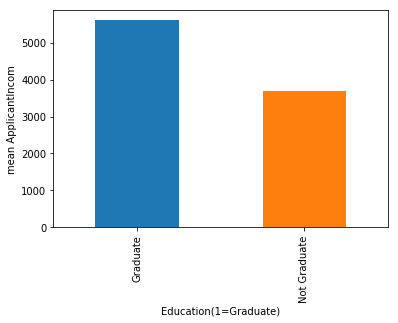

In [57]:
ax = combined.groupby('Education').ApplicantIncome.mean().plot(kind='bar')
ax.set_xlabel("Education(1=Graduate)")
ax.set_ylabel("mean ApplicantIncom")

Text(0,0.5,'mean ApplicantIncom')

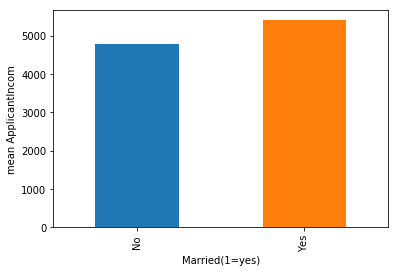

In [58]:
ax = combined.groupby('Married').ApplicantIncome.mean().plot(kind='bar')
ax.set_xlabel("Married(1=yes)")
ax.set_ylabel("mean ApplicantIncom")

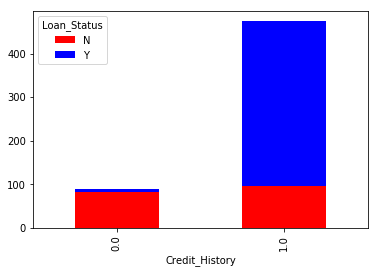

In [59]:

temp = pd.crosstab(data_train['Credit_History'], data_train['Loan_Status'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

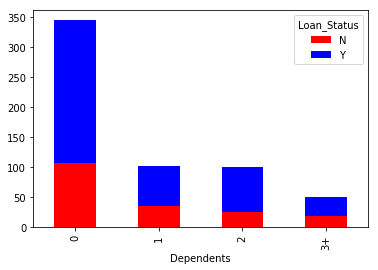

In [60]:
temp3 = pd.crosstab(data_train['Dependents'], data_train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

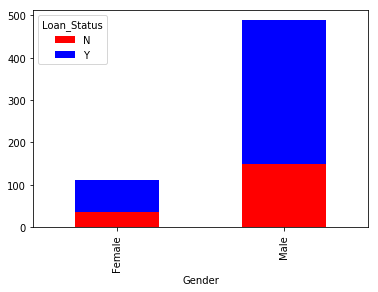

In [61]:
temp3 = pd.crosstab(data_train['Gender'], data_train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

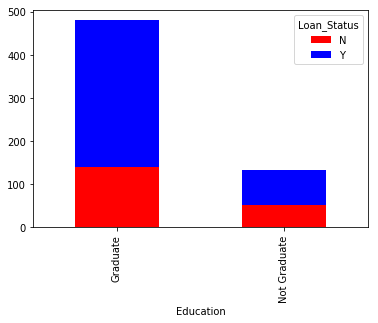

In [62]:
temp3 = pd.crosstab(data_train['Education'], data_train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

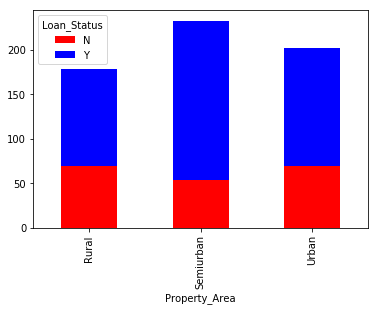

In [63]:
temp3 = pd.crosstab(data_train['Property_Area'], data_train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

# feature engineering

## one hot encoding

In [64]:
combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})
combined['Married'] = combined['Married'].map({'Yes':1,'No':0})
combined['Education'] = combined['Education'].map({'Graduate':1,'Not Graduate':0})
combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1,'No':0})

In [65]:
combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d=='1' else 0)
combined['Small_Family'] = combined['Dependents'].map(lambda d: 1 if d=='2' else 0)
combined['Large_Family'] = combined['Dependents'].map(lambda d: 1 if d=='3+' else 0)
combined.drop(['Dependents'], axis=1, inplace=True)

In [66]:
combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
combined.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)


In [67]:
combined['Income_Ratio'] = combined['Total_Income'] / combined['LoanAmount']


In [68]:
combined['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

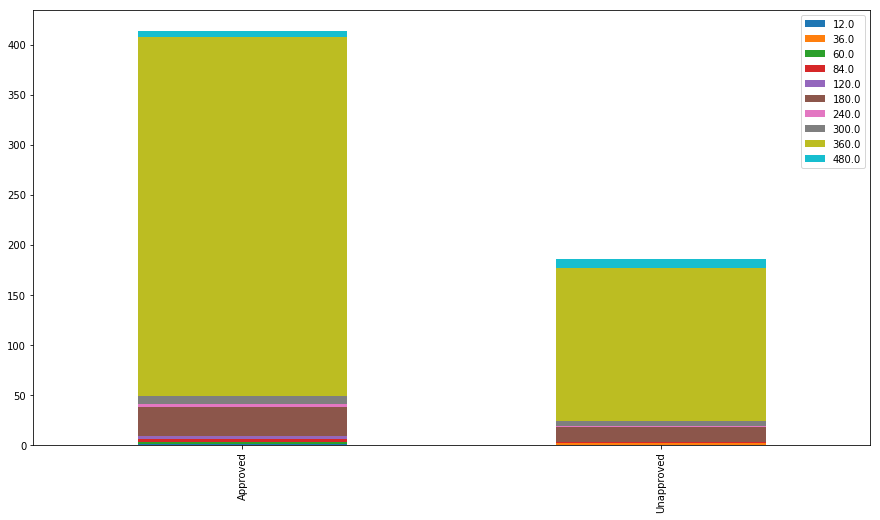

In [69]:
approved_term = data_train[data_train['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts()
unapproved_term = data_train[data_train['Loan_Status']=='N']['Loan_Amount_Term'].value_counts()
df = pd.DataFrame([approved_term,unapproved_term])
df.index = ['Approved','Unapproved']
df.plot(kind='bar', stacked=True, figsize=(15,8))

In [70]:
combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
combined.drop('Loan_Amount_Term', axis=1, inplace=True)


In [71]:
combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
combined['Credit_History_Unknown'] = combined['Credit_History'].map(lambda c: 1 if c==2 else 0)
combined.drop('Credit_History', axis=1, inplace=True)

In [72]:
property_dummies = pd.get_dummies(combined['Property_Area'], prefix='Property')
combined = pd.concat([combined, property_dummies], axis=1)
combined.drop('Property_Area', axis=1, inplace=True)

In [73]:
combined[60:70]

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_Income,Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
60,1,1,1,0,120.0,0,0,0,6296.0,52.466667,0,0,0,1,0,1,0,0,0,1
61,1,1,1,0,99.0,0,0,1,3029.0,30.595960,0,0,0,1,0,1,0,0,0,1
62,1,1,0,1,165.0,0,0,0,6058.0,36.715152,0,0,1,0,1,0,0,1,0,0
63,1,1,1,0,126.0,1,0,0,4945.0,39.246032,0,0,0,1,1,0,0,1,0,0
64,0,0,1,0,116.0,0,0,0,4166.0,35.913793,0,0,0,1,1,0,0,0,1,0
65,1,1,1,0,258.0,0,0,0,10321.0,40.003876,0,0,0,1,0,1,0,0,1,0
66,1,0,0,0,126.0,0,0,0,5454.0,43.285714,0,0,1,0,1,0,0,0,0,1
67,1,1,1,0,312.0,1,0,0,10750.0,34.455128,0,0,0,1,0,1,0,0,0,1
68,1,1,0,1,125.0,0,0,1,7100.0,56.800000,1,0,0,0,0,1,0,0,0,1
69,0,0,1,0,136.0,0,0,0,4300.0,31.617647,0,0,0,1,1,0,0,0,1,0


## feature scaling

In [74]:
def feature_scaling(dataframe):
    dataframe -= dataframe.min()
    dataframe /= dataframe.max()
    return dataframe

In [75]:
combined['LoanAmount'] = feature_scaling(combined['LoanAmount'])
combined['Total_Income'] = feature_scaling(combined['Total_Income'])
combined['Income_Ratio'] = feature_scaling(combined['Income_Ratio'])

In [76]:
combined.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Total_Income,Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Bad,Credit_History_Good,Credit_History_Unknown,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,1,0,0.169320,0,0,0,0.055394,0.071120,0,0,0,1,0,1,0,0,0,1
1,1,1,1,0,0.172214,1,0,0,0.058435,0.073382,0,0,0,1,0,1,0,1,0,0
2,1,1,1,1,0.082489,0,0,0,0.019583,0.069245,0,0,0,1,0,1,0,0,0,1
3,1,1,0,0,0.160637,0,0,0,0.043980,0.060939,0,0,0,1,0,1,0,0,0,1
4,1,0,1,0,0.191027,0,0,0,0.057292,0.063614,0,0,0,1,0,1,0,0,0,1


## prediction model

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [78]:
#function for computing score
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [79]:
#recovering train test &target
global combined, data_train
targets = data_train['Loan_Status'].map({'Y':1,'N':0})
train = combined.head(614)
test = combined.iloc[614:]


# Random forest algorithm

## feature imortance

In [80]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [81]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

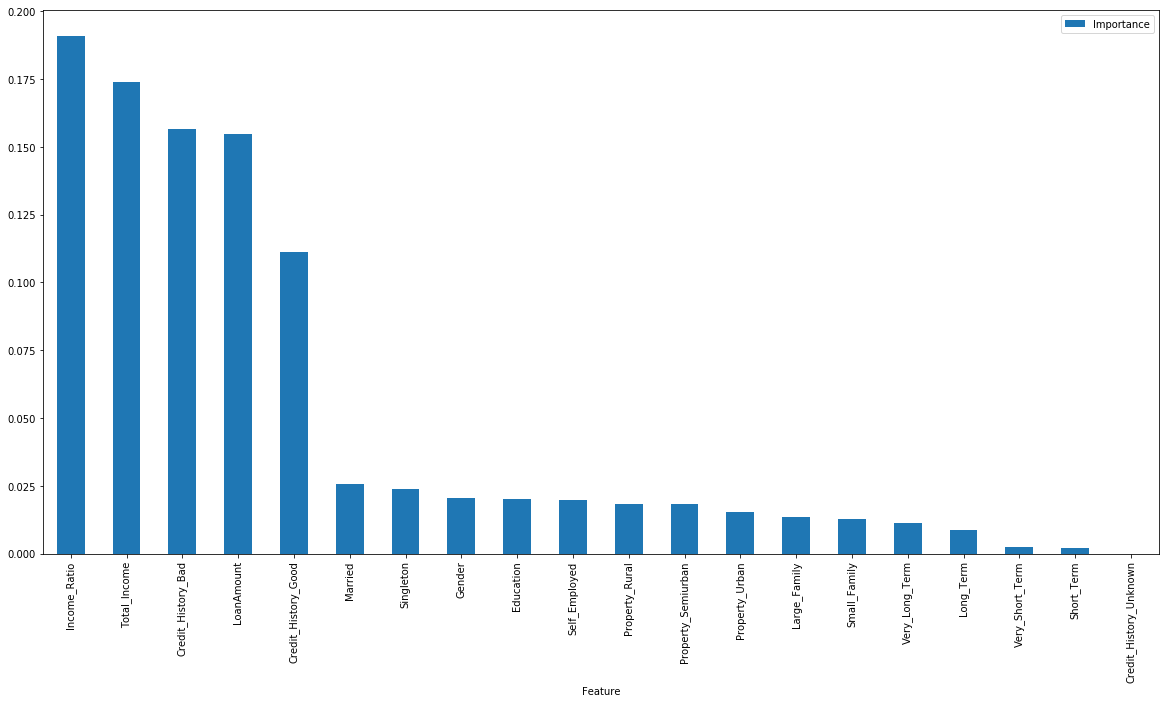

In [82]:
features.plot(kind='bar', figsize=(20, 10))

In [83]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(614, 5)

In [84]:
test_reduced = model.transform(test)
test_reduced.shape

(367, 5)

In [85]:
parameters  = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(train, targets)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
compute_score(model, train, targets, scoring='accuracy')

0.799788471708091

In [87]:
#saving output as output.csv
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('../input/test_Y3wMUE5_7gLdaTN.csv')
df_output['Loan_ID'] = aux['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output)
df_output[['Loan_ID','Loan_Status']].to_csv('output.csv',index=False)

# other algorithms

In [88]:
####Prediction model########
#Train-Test split
from sklearn.model_selection import train_test_split
datatrain, datatest, labeltrain, labeltest = train_test_split(train, targets, test_size = 0.2, random_state = 42)
labeltrain.shape

(491,)

In [89]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(datatrain, labeltrain)
logis_score_train = logis.score(datatrain, labeltrain)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(datatest, labeltest)
print("Testing score: ",logis_score_test)

Training score:  0.814663951120163
Testing score:  0.7886178861788617


In [90]:
#saving output as output.csv of decision tree
output2 = logis.predict(test).astype(int)
df_output2 = pd.DataFrame()
aux = pd.read_csv('../input/test_Y3wMUE5_7gLdaTN.csv')
df_output2['Loan_ID'] = aux['Loan_ID']
df_output2['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output2)
df_output2[['Loan_ID','Loan_Status']].to_csv('output2.csv',index=False)

In [91]:
#decision tree
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
dt.fit(datatrain, labeltrain)
dt_score_train = dt.score(datatrain, labeltrain)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(datatest, labeltest)
print("Testing score: ",dt_score_test)

Training score:  0.9938900203665988
Testing score:  0.7317073170731707


In [92]:
#saving output as output.csv of decision tree
#output2 = dt.predict(test).astype(int)
#df_output2 = pd.DataFrame()
#aux = pd.read_csv('../input/test_Y3wMUE5_7gLdaTN.csv')
#df_output2['Loan_ID'] = aux['Loan_ID']
#df_output2['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(output2)
#df_output2[['Loan_ID','Loan_Status']].to_csv('output2.csv',index=False)

In [93]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(datatrain, labeltrain)
rfc_score_train = rfc.score(datatrain, labeltrain)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(datatest, labeltest)
print("Testing score: ",rfc_score_test)

Training score:  0.9857433808553971
Testing score:  0.7073170731707317


In [94]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression',  'Decision Tree', 'Random Forest'],
        'Training_Score' : [logis_score_train,  dt_score_train, rfc_score_train],
        'Testing_Score'  : [logis_score_test, dt_score_test, rfc_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
0,Logistic Regression,0.814664,0.788618
1,Decision Tree,0.993890,0.731707
2,Random Forest,0.985743,0.707317
